# Data Cleaning

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 500)

In [48]:
df_links = pd.read_csv('links.csv')
df_movies = pd.read_csv('movies.csv')
df_tags = pd.read_csv('tags.csv')
df_ratings = pd.read_csv('ratings.csv')

In [49]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [50]:
df_movies.head()

,userId,movieId,rating,title,movie_year,(no genres listed),Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,Toy Story (1995),1995,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4.0,Grumpier Old Men (1995),1995,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,6,4.0,Heat (1995),1995,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),1995,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,50,5.0,"Usual Suspects, The (1995)",1995,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [51]:
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [52]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [53]:
#merge df_movies and df_ratings
df_movies = df_ratings.merge(movie_data,on='movieId', how='left')
df_movies.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [54]:
df_movies.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [55]:
#drop timestamp column
df_movies = df_movies.drop(columns='timestamp')



In [56]:
#split year and title from title column
df_movies['movie_year']=df_movies['title'].apply(lambda x: x.split(" ")[-1])

In [57]:
df_movies.head()

,userId,movieId,rating,title,genres,movie_year
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,(1995)
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,(1995)
2,1,6,4.0,Heat (1995),Action|Crime|Thriller,(1995)
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,(1995)
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,(1995)


In [13]:
#remove parenthesis from movie_year column 
df_movies['movie_year'] = df_movies['movie_year'].map(lambda x: x.lstrip('(').rstrip(')'))
df_movies

,userId,movieId,rating,title,genres,movie_year
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,1995
2,1,6,4.0,Heat (1995),Action|Crime|Thriller,1995
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995
...,...,...,...,...,...,...
100831,610,166534,4.0,Split (2017),Drama|Horror|Thriller,2017
100832,610,168248,5.0,John Wick: Chapter Two (2017),Action|Crime|Thriller,2017
100833,610,168250,5.0,Get Out (2017),Horror,2017
100834,610,168252,5.0,Logan (2017),Action|Sci-Fi,2017


In [14]:
df_movies = df_movies.join(df_movies.pop('genres').str.get_dummies('|'))

# EDA

In [18]:
ratings_data = pd.DataFrame(df_movies.groupby('title')['rating'].mean())

In [20]:
ratings_data['rating_count'] = pd.DataFrame(df_movies.groupby('title')['rating'].count())

In [21]:
ratings_data.head()

,rating,rating_count
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


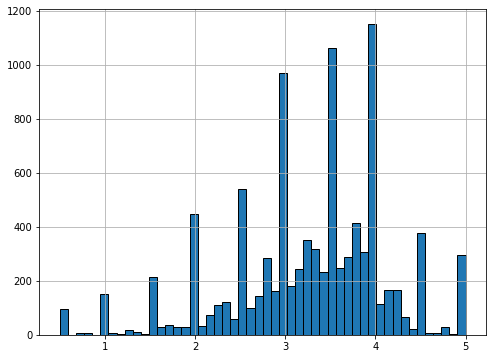

In [40]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_data['rating'].hist(bins=50)

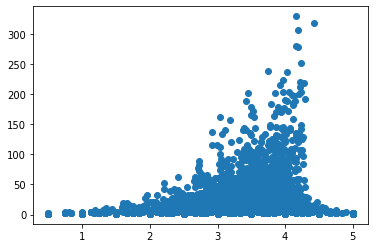

In [36]:
plt.scatter('rating', 'rating_count', data=ratings_data)

In [15]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   userId              100836 non-null  int64  
 1   movieId             100836 non-null  int64  
 2   rating              100836 non-null  float64
 3   title               100836 non-null  object 
 4   movie_year          100836 non-null  object 
 5   (no genres listed)  100836 non-null  int64  
 6   Action              100836 non-null  int64  
 7   Adventure           100836 non-null  int64  
 8   Animation           100836 non-null  int64  
 9   Children            100836 non-null  int64  
 10  Comedy              100836 non-null  int64  
 11  Crime               100836 non-null  int64  
 12  Documentary         100836 non-null  int64  
 13  Drama               100836 non-null  int64  
 14  Fantasy             100836 non-null  int64  
 15  Film-Noir           100836 non-nul

In [16]:
#descriptive statistics for movie ratings
df_movies['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [17]:
df_movies.rating.value_counts().sort_index(ascending=False)

5.0    13211
4.5     8551
4.0    26818
3.5    13136
3.0    20047
2.5     5550
2.0     7551
1.5     1791
1.0     2811
0.5     1370
Name: rating, dtype: int64

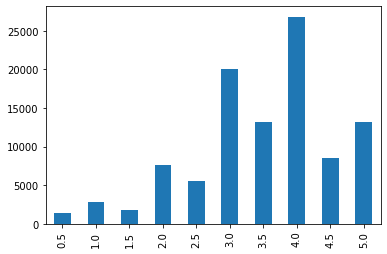

In [18]:
#bar chart of ratings in dataset
df_movies['rating'].value_counts().sort_index(ascending=True).plot(kind = 'bar')


In [19]:
#descriptive statistics for how many users reviewing movies and how many reviews they're each providing
df_movies['userId'].value_counts().describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: userId, dtype: float64

In [20]:
#unique movies
len(df_movies['movieId'].unique())

9724

In [21]:
df_movies['Action'].value_counts()

0    70201
1    30635
Name: Action, dtype: int64

In [22]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   userId              100836 non-null  int64  
 1   movieId             100836 non-null  int64  
 2   rating              100836 non-null  float64
 3   title               100836 non-null  object 
 4   movie_year          100836 non-null  object 
 5   (no genres listed)  100836 non-null  int64  
 6   Action              100836 non-null  int64  
 7   Adventure           100836 non-null  int64  
 8   Animation           100836 non-null  int64  
 9   Children            100836 non-null  int64  
 10  Comedy              100836 non-null  int64  
 11  Crime               100836 non-null  int64  
 12  Documentary         100836 non-null  int64  
 13  Drama               100836 non-null  int64  
 14  Fantasy             100836 non-null  int64  
 15  Film-Noir           100836 non-nul

In [23]:
action = (df_movies['Action'].values == 1).sum()
adventure = (df_movies['Adventure'].values == 1).sum()
animation = (df_movies['Animation'].values == 1).sum()
children = (df_movies['Children'].values == 1).sum()
comedy = (df_movies['Comedy'].values == 1).sum()
crime = (df_movies['Crime'].values == 1).sum()
documentary = (df_movies['Documentary'].values == 1).sum()
drama = (df_movies['Drama'].values == 1).sum()
fantasy = (df_movies['Fantasy'].values == 1).sum()
film_noir = (df_movies['Film-Noir'].values == 1).sum()
horror = (df_movies['Horror'].values == 1).sum()
imax = (df_movies['IMAX'].values == 1).sum()
musical = (df_movies['Musical'].values == 1).sum()
mystery = (df_movies['Mystery'].values == 1).sum()
romance = (df_movies['Romance'].values == 1).sum()
sci_fi = (df_movies['Sci-Fi'].values == 1).sum()
thriller = (df_movies['Thriller'].values == 1).sum()
war = (df_movies['War'].values == 1).sum()
western = (df_movies['Western'].values == 1).sum()

In [24]:
print("Action:", action)
print("Adventure:", adventure)
print("Animation:", animation)
print("Children :", children)
print("Comedy:", comedy)
print("Crime:", crime)
print("Documentary:", documentary)
print("Drama:", drama)
print("Fantasy:", fantasy)
print("Film-Noir:", film_noir)
print("Horror:", horror)
print("IMAX:", imax)
print("Musical:", musical)
print("Mystery:", mystery)
print("Romance:", romance)
print("Sci-Fi:", sci_fi)
print("Thriller:", thriller)
print("War:", war)
print("Western:", western)

Action: 30635
Adventure: 24161
Animation: 6988
Children : 9208
Comedy: 39053
Crime: 16681
Documentary: 1219
Drama: 41928
Fantasy: 11834
Film-Noir: 870
Horror: 7291
IMAX: 4145
Musical: 4138
Mystery: 7674
Romance: 18124
Sci-Fi: 17243
Thriller: 26452
War: 4859
Western: 1930


# Recommendation with Surprise

In [25]:
df_ratings = df_ratings.drop(columns='timestamp')

In [28]:
!Pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 8.2 MB/s eta 0:00:01    |█████████▌                      | 3.5 MB 2.0 MB/s eta 0:00:05
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-macosx_10_9_x86_64.whl size=783462 sha256=34dcc86fc3eaf7d22ea23d0f6a5dd6f6a7aeda401c845a66f116f4ee45735cb0
  Stored in directory: /Users/Ken/Library/Caches/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [31]:
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split
reader = Reader()
data = Dataset.load_from_df(df_ratings, reader)

In [32]:
trainset, testset = train_test_split(data, test_size=0.2)

In [34]:
from surprise.prediction_algorithms import knns
from surprise.similarities import cosine, msd, pearson
from surprise import accuracy

In [35]:
print('Number of users: ', trainset.n_users, '\n')
print('Number of items: ', trainset.n_items, '\n')

Number of users:  610 

Number of items:  8964 



In [43]:
basic = knns.KNNBasic()
basic.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [45]:
predictions = basic.test(testset)
print(accuracy.rmse(predictions))
print(accuracy.mae(predictions))

RMSE: 0.9488
0.9488311880888642
MAE:  0.7288
0.7287756708632531


In [46]:
sim_cos = {'name':'cosine', 'user_based':True}

In [47]:
cosine = knns.KNNBasic(sim_options=sim_cos)
cosine.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [48]:
predictions = cosine.test(testset)
print(accuracy.rmse(predictions))
print(accuracy.mae(predictions))

RMSE: 0.9736
0.973604273608819
MAE:  0.7512
0.7511522833564701


In [49]:
sim_pearson = {'name':'pearson', 'user_based':True}

In [50]:
pearson = knns.KNNBasic(sim_options=sim_pearson)
pearson.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [51]:
predictions = pearson.test(testset)
print(accuracy.rmse(predictions))
print(accuracy.mae(predictions))

RMSE: 0.9760
0.9760209642765041
MAE:  0.7533
0.7532865682541212


# SVD

In [52]:
from surprise.prediction_algorithms import SVD
from surprise.model_selection import GridSearchCV

In [53]:
param_grid = {'n_factors':[20, 60, 100],'n_epochs': [5, 7, 9],'reg_all': [0.2, 0.4, 0.6, 0.8]}


In [54]:
gs_svd = GridSearchCV(SVD,param_grid=param_grid,n_jobs = -1,joblib_verbose=5)


In [55]:
gs_svd.fit(data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  6.6min finished


In [56]:
print(gs_svd.best_score)
print(gs_svd.best_params)

{'rmse': 0.8831922086208568, 'mae': 0.6827577550112212}
{'rmse': {'n_factors': 20, 'n_epochs': 9, 'reg_all': 0.2}, 'mae': {'n_factors': 20, 'n_epochs': 9, 'reg_all': 0.2}}


# Recommendation System for Similarly Rated Movies

In [65]:
#create pivot table of movie ratings
movie_ratings_df = df_movies.pivot_table(index='userId', columns='title', values='rating')

In [68]:
movie_ratings_df.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Find Recommendation for Pulp Fiction

In [84]:
#Find user ratings for 'Pulp Fiction'
pulp_fiction = movie_ratings_df['Pulp Fiction (1994)']

In [85]:
pulp_fiction.head()

userId
1    3.0
2    NaN
3    NaN
4    1.0
5    5.0
Name: Pulp Fiction (1994), dtype: float64

In [86]:
movies_like_pulp_fiction = movie_ratings_df.corrwith(pulp_fiction)

corr_pulp_fiction = pd.DataFrame(movies_like_pulp_fiction, columns=['Correlation'])
corr_pulp_fiction.dropna(inplace=True)
corr_pulp_fiction.head()

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
"'burbs, The (1989)",-0.187323
(500) Days of Summer (2009),-0.044034
*batteries not included (1987),-0.738549
...And Justice for All (1979),-0.188982
10 Cent Pistol (2015),1.000000


In [87]:
corr_pulp_fiction = corr_pulp_fiction.join(ratings_data['rating_count'])
corr_pulp_fiction.head()

,Correlation,rating_count
title,,
"'burbs, The (1989)",-0.187323,17
(500) Days of Summer (2009),-0.044034,42
*batteries not included (1987),-0.738549,7
...And Justice for All (1979),-0.188982,3
10 Cent Pistol (2015),1.000000,2


In [120]:
corr_pulp_fiction[corr_pulp_fiction['rating_count']>100].sort_values('Correlation', ascending=False).head(25)

,Correlation,rating_count
title,,
Pulp Fiction (1994),1.000000,307
Fight Club (1999),0.543465,218
Kill Bill: Vol. 1 (2003),0.504147,131
Trainspotting (1996),0.437714,102
Kill Bill: Vol. 2 (2004),0.421685,110
"Usual Suspects, The (1995)",0.411700,204
"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",0.402193,120
Eternal Sunshine of the Spotless Mind (2004),0.401534,131
Reservoir Dogs (1992),0.394687,131
